# Zyfra Gold Mining Analysis

### Introduction

In this project, our objective is to create a model aimed at boosting efficiency in the gold mining and refining industry. We plan to carefully clean and prepare the data first to make sure it's accurate and useful. Then, we will test different models to find the best one for improving processes in this important field. Our goal is to not just increase efficiency but also to introduce more sustainable and cost-effective ways of mining and refining gold.

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import recall_score, precision_score, f1_score, roc_auc_score, r2_score, mean_absolute_error, mean_squared_error, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.model_selection import RandomizedSearchCV

In [2]:
gr_full = pd.read_csv("/datasets/gold_recovery_full.csv")
gr_test = pd.read_csv("/datasets/gold_recovery_test.csv")
gr_train = pd.read_csv("/datasets/gold_recovery_train.csv")
display(gr_full.info())
display(gr_test.info())
display(gr_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22716 entries, 0 to 22715
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                22716 non-null  object 
 1   final.output.concentrate_ag                         22627 non-null  float64
 2   final.output.concentrate_pb                         22629 non-null  float64
 3   final.output.concentrate_sol                        22331 non-null  float64
 4   final.output.concentrate_au                         22630 non-null  float64
 5   final.output.recovery                               20753 non-null  float64
 6   final.output.tail_ag                                22633 non-null  float64
 7   final.output.tail_pb                                22516 non-null  float64
 8   final.output.tail_sol                               22445 non-null  float64


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5856 entries, 0 to 5855
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5856 non-null   object 
 1   primary_cleaner.input.sulfate               5554 non-null   float64
 2   primary_cleaner.input.depressant            5572 non-null   float64
 3   primary_cleaner.input.feed_size             5856 non-null   float64
 4   primary_cleaner.input.xanthate              5690 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5840 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5840 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5840 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5840 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5840 non-null   float64
 10  primary_clea

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                16860 non-null  object 
 1   final.output.concentrate_ag                         16788 non-null  float64
 2   final.output.concentrate_pb                         16788 non-null  float64
 3   final.output.concentrate_sol                        16490 non-null  float64
 4   final.output.concentrate_au                         16789 non-null  float64
 5   final.output.recovery                               15339 non-null  float64
 6   final.output.tail_ag                                16794 non-null  float64
 7   final.output.tail_pb                                16677 non-null  float64
 8   final.output.tail_sol                               16715 non-null  float64


None

In [3]:
display(gr_train.shape)
display(gr_test.shape)
display(gr_full.shape)

(16860, 87)

(5856, 53)

(22716, 87)

In [4]:
display(gr_train.describe())
display(gr_test.describe())
display(gr_full.describe())

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,16788.000000,16788.000000,16490.000000,16789.000000,15339.000000,16794.000000,16677.000000,16715.000000,16794.000000,15553.000000,...,16731.000000,16747.000000,16768.000000,16767.000000,16775.000000,16775.000000,16775.000000,16776.000000,16757.000000,16775.000000
mean,4.716907,9.113559,8.301123,39.467217,67.213166,8.757048,2.360327,9.303932,2.687512,129.479789,...,19.101874,-494.164481,14.778164,-476.600082,15.779488,-500.230146,12.377241,-498.956257,18.429208,-521.801826
std,2.096718,3.389495,3.825760,13.917227,11.960446,3.634103,1.215576,4.263208,1.272757,45.386931,...,6.883163,84.803334,5.999149,89.381172,6.834703,76.983542,6.219989,82.146207,6.958294,77.170888
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000003,...,0.000000,-799.920713,0.000000,-800.021781,-0.423260,-799.741097,0.427084,-800.258209,0.024270,-810.473526
25%,3.971262,8.825748,6.939185,42.055722,62.625685,7.610544,1.641604,7.870275,2.172953,103.064021,...,14.508299,-500.837689,10.741388,-500.269182,10.977713,-500.530594,8.925586,-500.147603,13.977626,-501.080595
50%,4.869346,10.065316,8.557228,44.498874,67.644601,9.220393,2.453690,10.021968,2.781132,131.783108,...,19.986958,-499.778379,14.943933,-499.593286,15.998340,-499.784231,11.092839,-499.933330,18.034960,-500.109898
75%,5.821176,11.054809,10.289741,45.976222,72.824595,10.971110,3.192404,11.648573,3.416936,159.539839,...,24.983961,-494.648754,20.023751,-400.137948,20.000701,-496.531781,15.979467,-498.418000,24.984992,-499.565540
max,16.001945,17.031899,18.124851,53.611374,100.000000,19.552149,6.086532,22.317730,9.789625,251.999948,...,60.000000,-127.692333,28.003828,-71.472472,63.116298,-275.073125,39.846228,-120.190931,54.876806,-39.784927


,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,5554.000000,5572.000000,5856.000000,5690.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,...,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000
mean,170.515243,8.482873,7.264651,1.321420,1481.990241,-509.057796,1486.908670,-511.743956,1468.495216,-509.741212,...,15.636031,-516.266074,13.145702,-476.338907,12.308967,-512.208126,9.470986,-505.017827,16.678722,-512.351694
std,49.608602,3.353105,0.611526,0.693246,310.453166,61.339256,313.224286,67.139074,309.980748,62.671873,...,4.660835,62.756748,4.304086,105.549424,3.762827,58.864651,3.312471,68.785898,5.404514,69.919839
min,0.000103,0.000031,5.650000,0.000003,0.000000,-799.773788,0.000000,-800.029078,0.000000,-799.995127,...,0.000000,-799.798523,0.000000,-800.836914,-0.223393,-799.661076,0.528083,-800.220337,-0.079426,-809.859706
25%,143.340022,6.411500,6.885625,0.888769,1497.190681,-500.455211,1497.150234,-500.936639,1437.050321,-501.300441,...,12.057838,-501.054741,11.880119,-500.419113,10.123459,-500.879383,7.991208,-500.223089,13.012422,-500.833821
50%,176.103893,8.023252,7.259333,1.183362,1554.659783,-499.997402,1553.268084,-500.066588,1546.160672,-500.079537,...,17.001867,-500.160145,14.952102,-499.644328,12.062877,-500.047621,9.980774,-500.001338,16.007242,-500.041085
75%,207.240761,10.017725,7.650000,1.763797,1601.681656,-499.575313,1601.784707,-499.323361,1600.785573,-499.009545,...,18.030985,-499.441529,15.940011,-401.523664,15.017881,-499.297033,11.992176,-499.722835,21.009076,-499.395621
max,274.409626,40.024582,15.500000,5.433169,2212.432090,-57.195404,1975.147923,-142.527229,1715.053773,-150.937035,...,30.051797,-401.565212,31.269706,-6.506986,25.258848,-244.483566,14.090194,-126.463446,26.705889,-29.093593


,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,22627.000000,22629.000000,22331.000000,22630.000000,20753.000000,22633.000000,22516.000000,22445.000000,22635.000000,21107.000000,...,22571.000000,22587.000000,22608.000000,22607.000000,22615.000000,22615.000000,22615.000000,22616.000000,22597.000000,22615.000000
mean,4.781559,9.095308,8.640317,40.001172,67.447488,8.923690,2.488252,9.523632,2.827459,140.277672,...,18.205125,-499.878977,14.356474,-476.532613,14.883276,-503.323288,11.626743,-500.521502,17.976810,-519.361465
std,2.030128,3.230797,3.785035,13.398062,11.616034,3.517917,1.189407,4.079739,1.262834,49.919004,...,6.560700,80.273964,5.655791,93.822791,6.372811,72.925589,5.757449,78.956292,6.636203,75.477151
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000003,...,0.000000,-799.920713,0.000000,-800.836914,-0.423260,-799.741097,0.427084,-800.258209,-0.079426,-810.473526
25%,4.018525,8.750171,7.116799,42.383721,63.282393,7.684016,1.805376,8.143576,2.303108,110.177081,...,14.095940,-500.896232,10.882675,-500.309169,10.941299,-500.628697,8.037533,-500.167897,13.968418,-500.981671
50%,4.953729,9.914519,8.908792,44.653436,68.322258,9.484369,2.653001,10.212998,2.913794,141.330501,...,18.007326,-499.917108,14.947646,-499.612292,14.859117,-499.865158,10.989756,-499.951980,18.004215,-500.095463
75%,5.862593,10.929839,10.705824,46.111999,72.950836,11.084557,3.287790,11.860824,3.555077,174.049914,...,22.998194,-498.361545,17.977502,-400.224147,18.014914,-498.489381,14.001193,-499.492354,23.009704,-499.526388
max,16.001945,17.031899,19.615720,53.611374,100.000000,19.552149,6.086532,22.861749,9.789625,274.409626,...,60.000000,-127.692333,31.269706,-6.506986,63.116298,-244.483566,39.846228,-120.190931,54.876806,-29.093593


In [5]:
date_flag = False 

In [6]:
for dfs, dt in zip([gr_train, gr_test, gr_full], ['date', 'date', 'date']):
    if date_flag == True:
        # In case this is run twice in the same kernel
        print(f'The date column has already been set to a datetime dtype and set as index')
        print('\n\n')
    else:
        # Set dataframe's date colum to datetime and check to ensure it changed
        dfs[dt] = pd.to_datetime(dfs[dt], format='%Y-%m-%d %H:%M:%S', errors='coerce')
        print(f'The date column has been converted to {dfs[dt].dtype}')
        # Change the index to the date column
        dfs.set_index('date', inplace = True)
        print(f'The date column has been set to the dataframe\'s index')
        print('\n\n')
        
date_flag = True       

The date column has been converted to datetime64[ns]
The date column has been set to the dataframe's index



The date column has been converted to datetime64[ns]
The date column has been set to the dataframe's index



The date column has been converted to datetime64[ns]
The date column has been set to the dataframe's index





### 1.2 Checking Recovery Calculation

In [7]:
#drop na values to prevent errors with MAE function
gr_train_no_nulls = gr_train.dropna(subset=['rougher.output.recovery'])
def recovery(c, f, t):
    #C — share of gold in the concentrate right after flotation
    #F — share of gold in the feed before flotation
    #T — share of gold in the rougher tails right after flotation
    recovery = (c*(f-t))/(f*(c-t))*100
    return recovery
data_recovery = gr_train_no_nulls['rougher.output.recovery']
calculated_recovery = recovery(gr_train_no_nulls['rougher.output.concentrate_au'], gr_train_no_nulls['rougher.input.feed_au'], gr_train_no_nulls['rougher.output.tail_au'])
print(f'Mean Absolute Error: {mean_absolute_error(data_recovery, calculated_recovery)}')

Mean Absolute Error: 9.303415616264301e-15


Since the MAE is so low 0.00000000000000930, the difference between the calculated recovery and the recovery in the data can be considered the same.

### 1.3 Analyzing missing features

In [8]:
missing_features = set(gr_train.columns) - set(gr_test.columns)

# Extracting the types of the missing features from the training set
missing_features_types = {feature: gr_train[feature].dtype for feature in missing_features}

# Creating a DataFrame from the missing features and their types
missing_features_df = pd.DataFrame(list(missing_features_types.items()), columns=['Feature', 'Type'])

print(missing_features_df)

                                              Feature     Type
0                   secondary_cleaner.output.tail_sol  float64
1                       rougher.output.concentrate_au  float64
2                      rougher.output.concentrate_sol  float64
3                       rougher.output.concentrate_pb  float64
4               primary_cleaner.output.concentrate_ag  float64
5                    secondary_cleaner.output.tail_ag  float64
6                                final.output.tail_pb  float64
7   rougher.calculation.floatbank10_sulfate_to_au_...  float64
8                         final.output.concentrate_ag  float64
9                      primary_cleaner.output.tail_pb  float64
10  rougher.calculation.floatbank11_sulfate_to_au_...  float64
11                            rougher.output.tail_sol  float64
12                     primary_cleaner.output.tail_ag  float64
13                              final.output.recovery  float64
14                       final.output.concentrate_sol  

Looking at the dataframe, all the data that is missing from the test set are of type float64 and are either outputs or calculations.

### 1.4 Preprocessing the data

In [9]:
#check for duplicates 
display(gr_train.duplicated().sum())
display(gr_test.duplicated().sum())
display(gr_full.duplicated().sum())

16

6

22

In [10]:
#check for missing values, get percentage
train_missing = gr_train.isna().sum() / len(gr_train) * 100
display(train_missing)
display(train_missing.max())

final.output.concentrate_ag                   0.427046
final.output.concentrate_pb                   0.427046
final.output.concentrate_sol                  2.194543
final.output.concentrate_au                   0.421115
final.output.recovery                         9.021352
                                                ...   
secondary_cleaner.state.floatbank5_a_level    0.504152
secondary_cleaner.state.floatbank5_b_air      0.504152
secondary_cleaner.state.floatbank5_b_level    0.498221
secondary_cleaner.state.floatbank6_a_air      0.610913
secondary_cleaner.state.floatbank6_a_level    0.504152
Length: 86, dtype: float64

15.26097271648873

In [11]:
#check for missing values, get percentage
test_missing = gr_test.isna().sum() / len(gr_test) * 100
display(test_missing)
display(test_missing.max())

primary_cleaner.input.sulfate                 5.157104
primary_cleaner.input.depressant              4.849727
primary_cleaner.input.feed_size               0.000000
primary_cleaner.input.xanthate                2.834699
primary_cleaner.state.floatbank8_a_air        0.273224
primary_cleaner.state.floatbank8_a_level      0.273224
primary_cleaner.state.floatbank8_b_air        0.273224
primary_cleaner.state.floatbank8_b_level      0.273224
primary_cleaner.state.floatbank8_c_air        0.273224
primary_cleaner.state.floatbank8_c_level      0.273224
primary_cleaner.state.floatbank8_d_air        0.273224
primary_cleaner.state.floatbank8_d_level      0.273224
rougher.input.feed_ag                         0.273224
rougher.input.feed_pb                         0.273224
rougher.input.feed_rate                       0.683060
rougher.input.feed_size                       0.375683
rougher.input.feed_sol                        1.144126
rougher.input.feed_au                         0.273224
rougher.in

6.0280054644808745

In [12]:
#check for missing values, get percentage
full_missing = gr_full.isna().sum() / len(gr_full) * 100
display(full_missing)
display(full_missing.max())

final.output.concentrate_ag                   0.391794
final.output.concentrate_pb                   0.382990
final.output.concentrate_sol                  1.694841
final.output.concentrate_au                   0.378588
final.output.recovery                         8.641486
                                                ...   
secondary_cleaner.state.floatbank5_a_level    0.444621
secondary_cleaner.state.floatbank5_b_air      0.444621
secondary_cleaner.state.floatbank5_b_level    0.440218
secondary_cleaner.state.floatbank6_a_air      0.523860
secondary_cleaner.state.floatbank6_a_level    0.444621
Length: 86, dtype: float64

13.730410283500616

Since the we are missing up to 13% in the full and training data, we will need to deal with the missing values in all the dataframes by filling them with the median.

In [13]:
gr_train = gr_train.fillna(gr_train.median(numeric_only=True))
gr_test = gr_test.fillna(gr_test.median(numeric_only=True))
gr_full = gr_full.fillna(gr_full.median(numeric_only=True))

In [14]:
full_missing = gr_full.isna().sum() / len(gr_full) * 100
display(full_missing.max())

0.0

In [15]:
test_missing = gr_test.isna().sum() / len(gr_test) * 100
display(test_missing.max())

0.0

In [16]:
train_missing = gr_train.isna().sum() / len(gr_train) * 100
display(train_missing.max())

0.0

After filling the columns with the median, there are no more missing column values.

### 2.1 Metal concentrations at different stages.

In [17]:
#spliting the metals into seperate dataframes
au = gr_full[['rougher.input.feed_au','rougher.output.concentrate_au', 'primary_cleaner.output.concentrate_au', 'final.output.concentrate_au']].copy()
ag = gr_full[['rougher.input.feed_ag','rougher.output.concentrate_ag', 'primary_cleaner.output.concentrate_ag', 'final.output.concentrate_ag']].copy()
pb = gr_full[['rougher.input.feed_pb','rougher.output.concentrate_pb', 'primary_cleaner.output.concentrate_pb', 'final.output.concentrate_pb']].copy()

In [18]:
#inspect each metal's df
display(au.info())
display(ag.info())
display(pb.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 22716 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 4 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   rougher.input.feed_au                  22716 non-null  float64
 1   rougher.output.concentrate_au          22716 non-null  float64
 2   primary_cleaner.output.concentrate_au  22716 non-null  float64
 3   final.output.concentrate_au            22716 non-null  float64
dtypes: float64(4)
memory usage: 887.3 KB


None

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 22716 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 4 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   rougher.input.feed_ag                  22716 non-null  float64
 1   rougher.output.concentrate_ag          22716 non-null  float64
 2   primary_cleaner.output.concentrate_ag  22716 non-null  float64
 3   final.output.concentrate_ag            22716 non-null  float64
dtypes: float64(4)
memory usage: 887.3 KB


None

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 22716 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 4 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   rougher.input.feed_pb                  22716 non-null  float64
 1   rougher.output.concentrate_pb          22716 non-null  float64
 2   primary_cleaner.output.concentrate_pb  22716 non-null  float64
 3   final.output.concentrate_pb            22716 non-null  float64
dtypes: float64(4)
memory usage: 887.3 KB


None

In [19]:
display(au.sample(10))
display(ag.sample(10))
display(pb.sample(10))

,rougher.input.feed_au,rougher.output.concentrate_au,primary_cleaner.output.concentrate_au,final.output.concentrate_au
date,,,,
2017-12-09 21:59:59,9.152000,22.050024,30.021166,44.797059
2018-05-18 11:59:59,6.371632,19.073292,28.621833,43.465774
2018-08-15 14:59:59,6.733475,19.909058,26.107790,44.054132
2016-11-20 17:59:59,9.865336,22.788751,33.773961,45.448862
2017-04-13 16:59:59,6.954390,19.510773,34.206819,47.650684
2016-10-23 00:59:59,10.798967,24.080236,36.202377,47.174189
2017-12-02 23:59:59,8.909313,20.985875,34.107699,37.363455
2017-05-09 06:59:59,8.245608,22.863803,18.520556,29.728373
2017-06-21 16:59:59,7.428888,20.226572,34.312633,43.206253


,rougher.input.feed_ag,rougher.output.concentrate_ag,primary_cleaner.output.concentrate_ag,final.output.concentrate_ag
date,,,,
2017-09-05 20:59:59,0.000000,0.000000,0.000000,6.202827
2016-06-30 13:59:59,9.009753,16.178572,10.805552,11.500001
2016-07-12 14:59:59,7.884212,13.158831,8.857675,6.947330
2017-12-31 05:59:59,11.888136,13.754501,10.152445,5.323735
2018-01-05 18:59:59,0.000000,0.000000,0.000000,0.000000
2016-09-20 11:59:59,9.456133,12.555207,8.568252,4.864543
2017-10-28 06:59:59,12.629388,15.138356,11.177120,6.123194
2016-01-25 23:00:00,9.802633,11.764236,10.302415,4.681803
2017-04-10 01:59:59,8.180935,10.745621,7.586827,4.396328


,rougher.input.feed_pb,rougher.output.concentrate_pb,primary_cleaner.output.concentrate_pb,final.output.concentrate_pb
date,,,,
2017-05-06 23:59:59,4.391911,8.903900,10.191536,10.420573
2017-11-30 05:59:59,5.230516,8.785253,11.861868,10.779096
2017-12-12 01:59:59,0.751482,4.944750,11.053981,8.014573
2016-09-05 09:59:59,3.977533,0.000000,11.543860,10.444992
2017-04-08 10:59:59,4.021280,8.696464,11.319576,12.831923
2018-02-12 09:59:59,2.525621,6.336836,10.725111,10.085956
2017-05-03 15:59:59,3.454167,7.777432,11.418479,9.881477
2018-06-22 21:59:59,2.905335,6.107500,8.812257,5.795421
2017-03-14 12:59:59,4.030239,7.708693,10.425138,9.290107


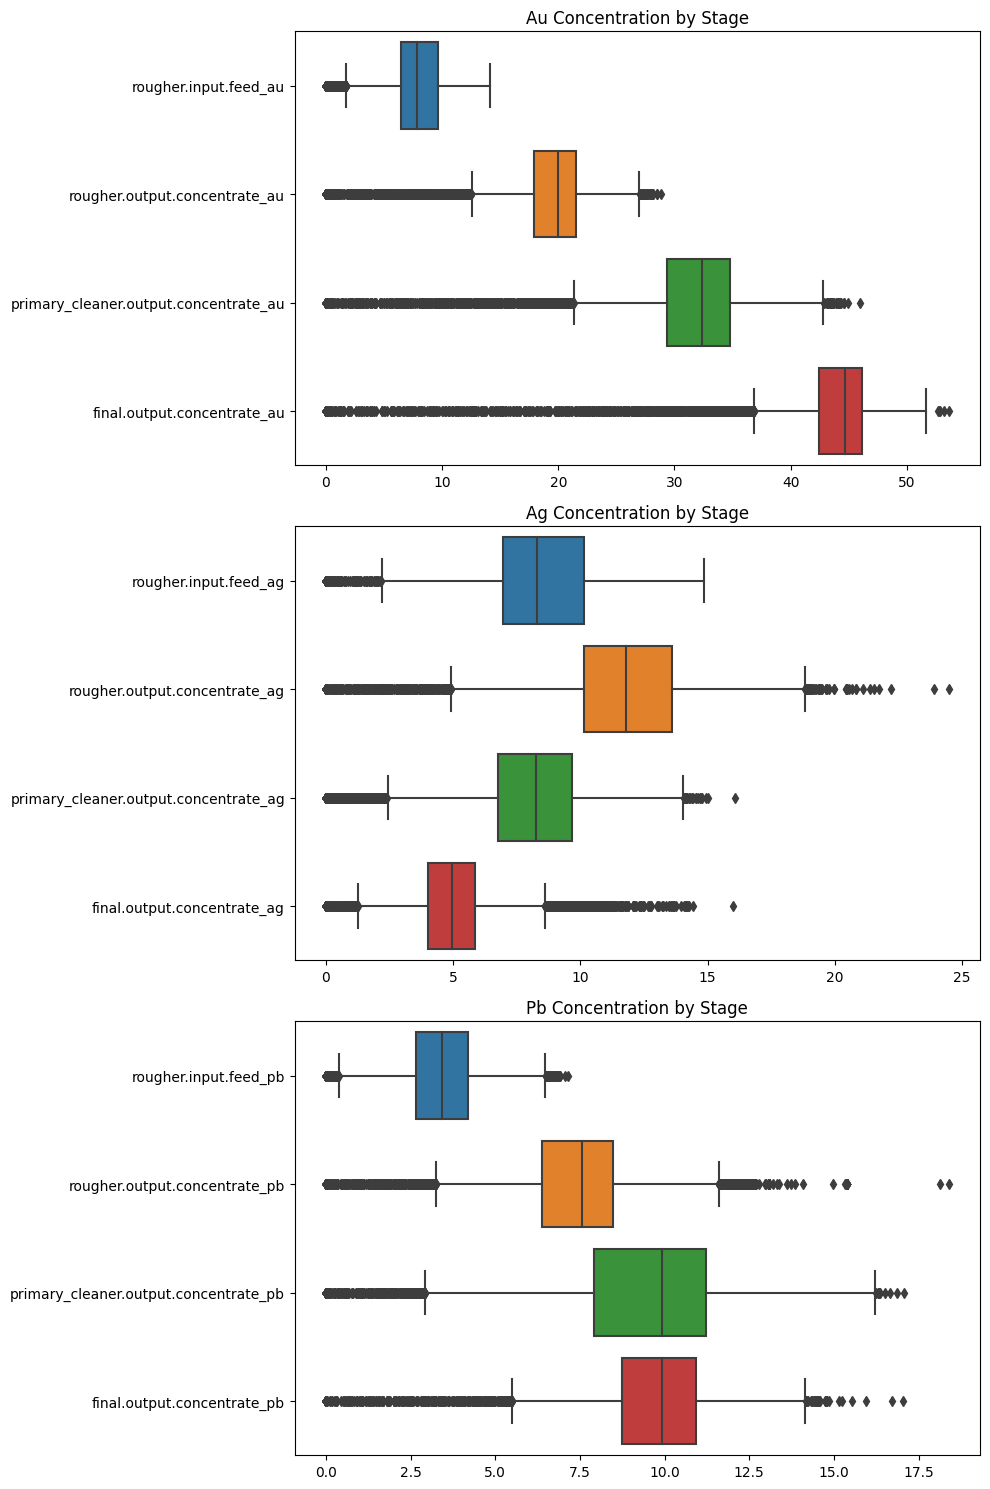

In [20]:
#create plots to visualize the data
fig, axes = plt.subplots(3, 1, figsize=(10, 15))
# Plot for Au
sns.boxplot(data=au, orient='h', ax=axes[0])
axes[0].set_title('Au Concentration by Stage')
# Plot for Ag
sns.boxplot(data=ag, orient='h', ax=axes[1])
axes[1].set_title('Ag Concentration by Stage')
# Plot for Pb
sns.boxplot(data=pb, orient='h', ax=axes[2])
axes[2].set_title('Pb Concentration by Stage')
plt.tight_layout() 
plt.show()

During the purification process, the concentrations of both Au and Pb increase, while the concentration of Ag slightly decreases overall.

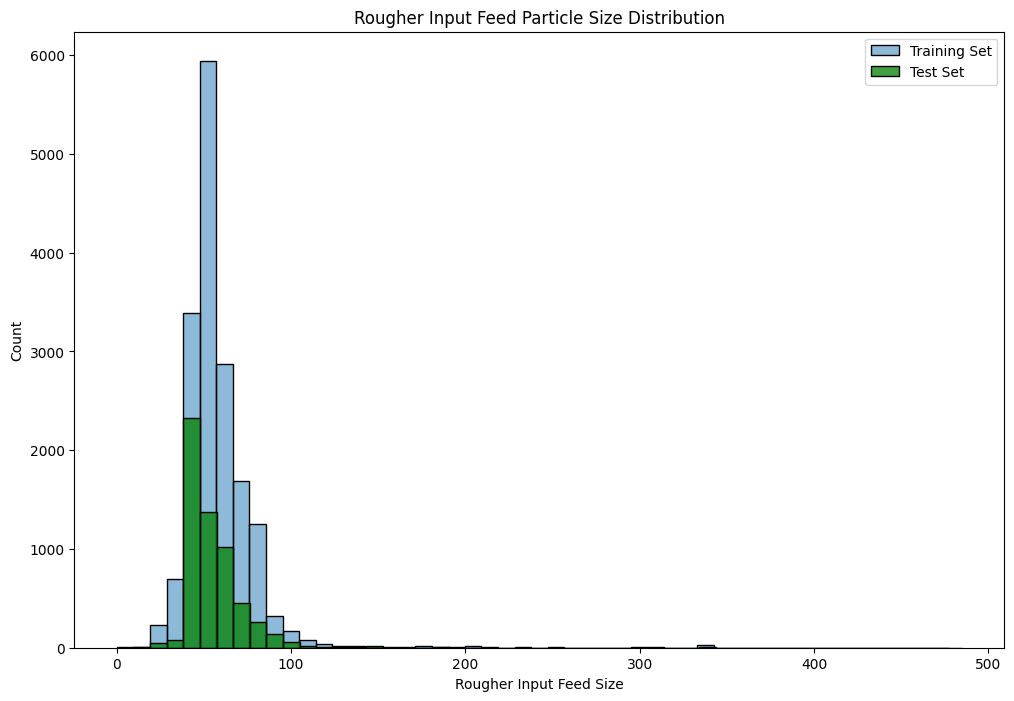

In [21]:
plt.figure(figsize=(12, 8))
sns.histplot(gr_train['rougher.input.feed_size'], bins=50, label="Training Set", alpha=0.5) #Training Set
sns.histplot(gr_test['rougher.input.feed_size'], bins=50, label="Test Set", color='green') #Test Set
plt.title("Rougher Input Feed Particle Size Distribution")
plt.legend()
plt.xlabel('Rougher Input Feed Size')
plt.show()

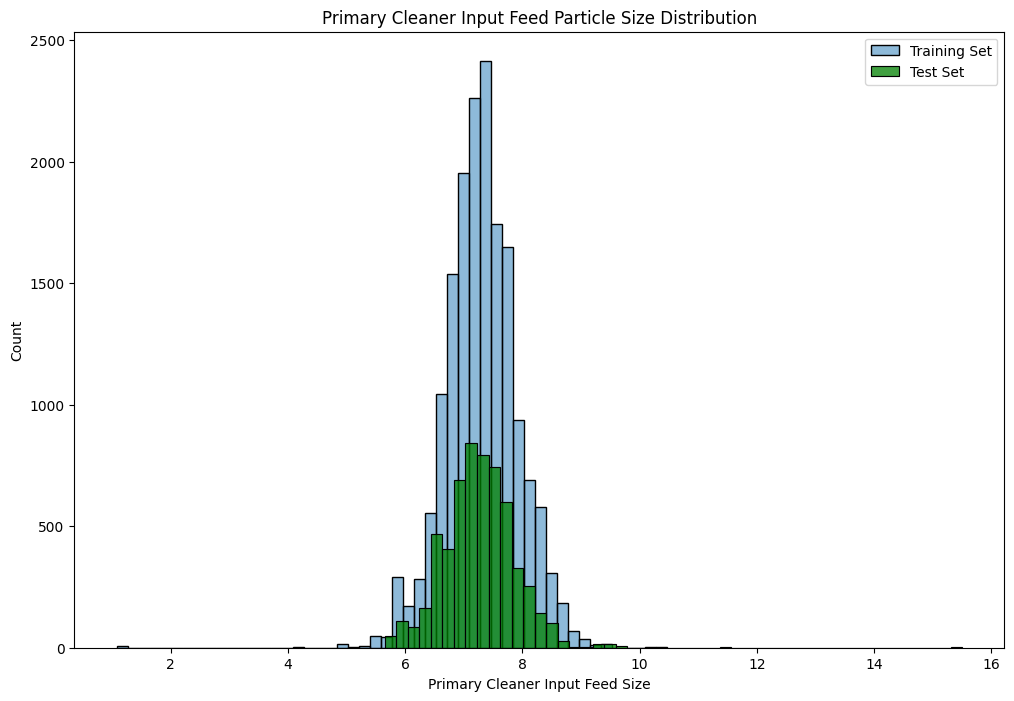

In [22]:
plt.figure(figsize=(12, 8))
sns.histplot(gr_train['primary_cleaner.input.feed_size'], bins=50, label="Training Set", alpha=0.5)
sns.histplot(gr_test['primary_cleaner.input.feed_size'], bins=50, label="Test Set", color='green')
plt.title("Primary Cleaner Input Feed Particle Size Distribution")
plt.legend()
plt.xlabel('Primary Cleaner Input Feed Size')
plt.show()

Examining the histograms presented, it becomes apparent that the distributions for both the primary cleaner and rougher input sizes exhibit a notable degree of similarity. However, it's important to highlight that the test dataset is significantly smaller in comparison.

### 2.3 Total concentration across metals

In [23]:
#create 3 dataframes, one for each stage and add all the metals.
raw_feed = gr_full['rougher.input.feed_au'] + gr_full['rougher.input.feed_ag'] + gr_full['rougher.input.feed_pb']
rougher_concentrate = gr_full['rougher.output.concentrate_au'] + gr_full['rougher.output.concentrate_ag'] + gr_full['rougher.output.concentrate_pb']
final_concentrate = gr_full['final.output.concentrate_au'] + gr_full['final.output.concentrate_ag'] + gr_full['final.output.concentrate_pb']

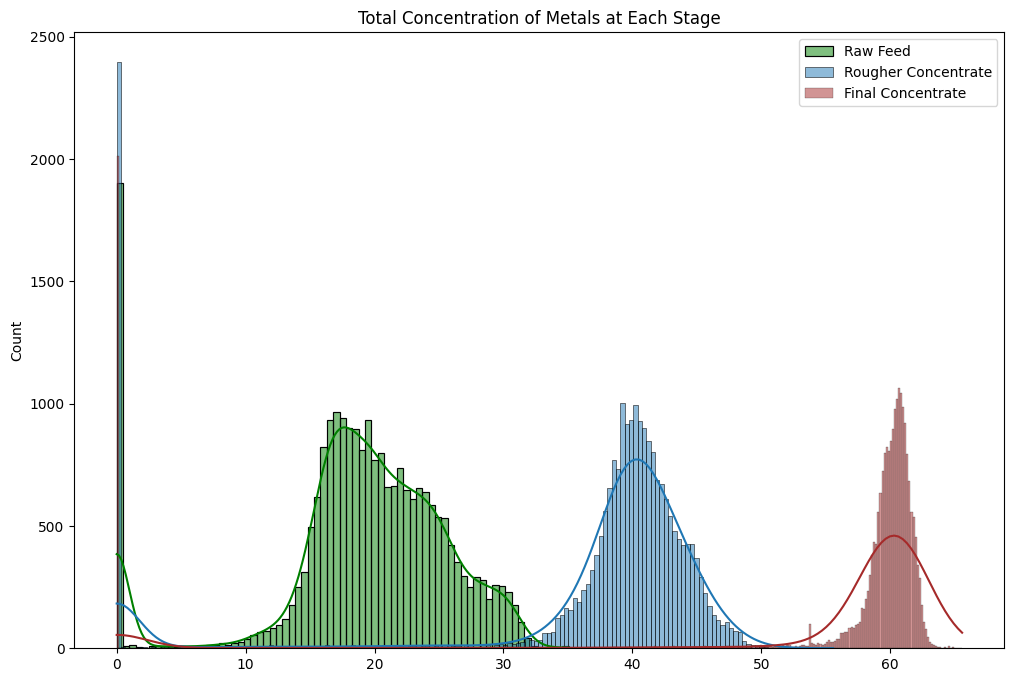

In [24]:
#Plot the total concentration of metals at
plt.figure(figsize=(12, 8))
sns.histplot(data=raw_feed, color='green', alpha=0.5, legend=True, kde=True, label='Raw Feed')
sns.histplot(data=rougher_concentrate, legend=True, kde=True, label='Rougher Concentrate')
sns.histplot(data=final_concentrate, color="brown", legend=True, kde=True, label='Final Concentrate')
plt.legend()
plt.title('Total Concentration of Metals at Each Stage')
plt.show()

The histogram depicts the total metal concentration at three stages of processing. The concentration increases from raw feed to final concentrate. However, there's a notable number of entries with near-zero values across all stages, which could indicate measurement errors or other anomalies that may require further investigation. The distributions are right-skewed, suggesting a tail of high concentration values, particularly in the later stages of processing.

In [25]:
#remove Zeros

features_rougher_input_concentrate= [
    'rougher.input.feed_au',
    'rougher.input.feed_ag',
    'rougher.input.feed_pb',
    'rougher.input.feed_sol',
]

features_rougher_output_concentrate = [
    'rougher.output.concentrate_au',
    'rougher.output.concentrate_ag',
    'rougher.output.concentrate_pb',
    'rougher.output.concentrate_sol',
]

features_final_output_concentrate = [
    'final.output.concentrate_au',
    'final.output.concentrate_ag',
    'final.output.concentrate_pb',
    'final.output.concentrate_sol',
]



threshold = 0.01

df_train2 = gr_train[gr_train[features_rougher_input_concentrate].sum(1) > threshold].reset_index()
df_train2 = gr_train[gr_train[features_rougher_output_concentrate].sum(1) > threshold].reset_index()
df_train2 = gr_train[gr_train[features_final_output_concentrate].sum(1) > threshold].reset_index()

print(gr_train.shape)
print(df_train2.shape)

(16860, 86)
(15597, 87)


In [26]:
df_full_test = gr_full.loc[gr_test.index]
df_test = gr_test[df_full_test[features_rougher_input_concentrate].sum(1) > threshold]
df_test = gr_test[df_full_test[features_rougher_output_concentrate].sum(1) > threshold]
df_test = gr_test[df_full_test[features_final_output_concentrate].sum(1) > threshold]

df_test.head()

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,-500.704369,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,-499.240168,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,-502.151509,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,-498.355873,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,-500.810606,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


### 3.1 Function for final sMAPE

In [27]:
def smape(y_true, y_pred):
    
    """
    Calculate the Symmetric Mean Absolute Percentage Error (sMAPE).

    Parameters:
    y_true : array-like of shape (n_samples,)
        Actual (true) values.
    y_pred : array-like of shape (n_samples,)
        Predicted values.

    Returns:
    float
        sMAPE score.
    """
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)

    numerator = np.abs(y_true - y_pred)
    denominator = np.abs(y_true) + np.abs(y_pred)

    epsilon = 1e-10
    denominator = np.where(denominator == 0, epsilon, denominator)

    smape_values = (numerator / denominator) * 2 * 100
    smape_score = np.mean(smape_values)

    return smape_score

In [28]:
def final_smape(rougher_true, rougher_pred, final_true, final_pred):
    """
    Calculate the final sMAPE value combining rougher and final stages.

    Parameters:
    rougher_true : array-like of shape (n_samples,)
        Actual (true) values for rougher stage.
    rougher_pred : array-like of shape (n_samples,)
        Predicted values for rougher stage.
    final_true : array-like of shape (n_samples,)
        Actual (true) values for final stage.
    final_pred : array-like of shape (n_samples,)
        Predicted values for final stage.

    Returns:
    float
        Final sMAPE score.
    """
    smape_rougher = smape(rougher_true, rougher_pred)
    smape_final = smape(final_true, final_pred)

    final_smape_score = 0.25 * smape_rougher + 0.75 * smape_final

    return final_smape_score

In [29]:
def smape(y_true, y_pred):
    assert y_true.shape == y_pred.shape, "Shapes of true and predicted values must match"
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return 100 * np.mean(2 * np.abs(y_pred - y_true) / (np.abs(y_true) + np.abs(y_pred)))
def fsmape(target, prediction):
    return np.mean(2 * np.abs(target - prediction) / (np.abs(target) + np.abs(prediction))) * 100

def fsmape(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(2 * np.abs(y_true - y_pred) / (np.abs(y_true) + np.abs(y_pred))) * 100

scorer = make_scorer(fsmape, greater_is_better=False)

In [30]:
def fsmape(y_true, y_pred):
    if y_true.ndim == 1:
        y_true = y_true.reshape(-1, 2)
    if y_pred.ndim == 1:
        y_pred = y_pred.reshape(-1, 2)
    
    # Remove .values as y_true and y_pred are expected to be numpy arrays
    predicted_rough, predicted_final = y_pred[:, 0], y_pred[:, 1]
    true_rough, true_final = y_true[:, 0], y_true[:, 1]

    rough_smape = smape(true_rough, predicted_rough)
    final_smape = smape(true_final, predicted_final)
    
    return (rough_smape + final_smape) / 2

def fsmape(y_true, y_pred):
    y_true, y_pred = np.array(y_true).flatten(), np.array(y_pred).flatten()
    non_zero = (np.abs(y_true) + np.abs(y_pred)) > 0  # avoid division by zero
    return np.mean(2 * np.abs(y_true[non_zero] - y_pred[non_zero]) / (np.abs(y_true[non_zero]) + np.abs(y_pred[non_zero]))) * 100

scorer = make_scorer(fsmape, greater_is_better=False)


In [31]:
gr_train.columns

Index(['final.output.concentrate_ag', 'final.output.concentrate_pb',
       'final.output.concentrate_sol', 'final.output.concentrate_au',
       'final.output.recovery', 'final.output.tail_ag', 'final.output.tail_pb',
       'final.output.tail_sol', 'final.output.tail_au',
       'primary_cleaner.input.sulfate', 'primary_cleaner.input.depressant',
       'primary_cleaner.input.feed_size', 'primary_cleaner.input.xanthate',
       'primary_cleaner.output.concentrate_ag',
       'primary_cleaner.output.concentrate_pb',
       'primary_cleaner.output.concentrate_sol',
       'primary_cleaner.output.concentrate_au',
       'primary_cleaner.output.tail_ag', 'primary_cleaner.output.tail_pb',
       'primary_cleaner.output.tail_sol', 'primary_cleaner.output.tail_au',
       'primary_cleaner.state.floatbank8_a_air',
       'primary_cleaner.state.floatbank8_a_level',
       'primary_cleaner.state.floatbank8_b_air',
       'primary_cleaner.state.floatbank8_b_level',
       'primary_cleaner.state

In [32]:
#seperate features and targets
features_train = df_train2
target_train = df_train2[['rougher.output.recovery', 'final.output.recovery']]

features_test = gr_test
target_test =  df_full_test[['rougher.output.recovery', 'final.output.recovery']].loc[gr_test.index].reset_index(drop=True)

In [33]:
# Step 1: Calculate medians from the training data
median_rougher_output_recovery = target_train['rougher.output.recovery'].median()
median_final_output_recovery = target_train['final.output.recovery'].median()

# Step 2: Use the calculated medians to predict on both training and test data
# Predict on the training data
pred_median_train = target_train.copy()
pred_median_train['rougher.output.recovery'] = median_rougher_output_recovery
pred_median_train['final.output.recovery'] = median_final_output_recovery

print('Weighted sMAPE on Target Train:')
print(fsmape(target_train.to_numpy(), pred_median_train.to_numpy()))

# Predict on the test data
pred_median_test = target_test.copy()
pred_median_test['rougher.output.recovery'] = median_rougher_output_recovery
pred_median_test['final.output.recovery'] = median_final_output_recovery

print('Weighted sMAPE on Target Test:')
print(fsmape(target_test.to_numpy(), pred_median_test.to_numpy()))

Weighted sMAPE on Target Train:
10.772275188139217
Weighted sMAPE on Target Test:
8.961578132012898


In [34]:
#check data shape
display(features_train.shape)
display(target_train.shape)

(15597, 87)

(15597, 2)

In [35]:
features_train = features_train[features_train.columns].drop(['date'], axis=1)

In [36]:
# Verify feature consistency between training and test sets
print("Training Features Shape:", features_train.shape)
print("Test Features Shape:", features_test.shape)

# Check if column names are the same
if list(features_train.columns) != list(features_test.columns):
    print("Column names do not match between training and test sets.")
    # Align columns between train and test sets
    common_columns = features_train.columns.intersection(features_test.columns)
    features_train = features_train[common_columns]
    features_test = features_test[common_columns]

print("Aligned Training Features Shape:", features_train.shape)
print("Aligned Test Features Shape:", features_test.shape)


Training Features Shape: (15597, 86)
Test Features Shape: (5856, 52)
Column names do not match between training and test sets.
Aligned Training Features Shape: (15597, 52)
Aligned Test Features Shape: (5856, 52)


### 3.2 Model Training

In [37]:
#score models using kfold validation
def score_model(model, cv=4):
    scores = []
    for subtrain_index, valid_index in KFold(n_splits=cv).split(features_train): 
        features_subtrain = features_train.loc[subtrain_index].reset_index(drop=True)
        target_subtrain = target_train.loc[subtrain_index].reset_index(drop=True)
        features_valid = features_train.loc[valid_index].reset_index(drop=True)
        target_valid = target_train.loc[valid_index].reset_index(drop=True)
        
        model.fit(features_subtrain, target_subtrain)
        pred_valid = pd.DataFrame(model.predict(features_valid))
        
        scores.append(smape(target_valid, pred_valid))
    
    return pd.Series(scores).mean()

In [38]:
model = LinearRegression()
linear_score = score_model(model)
print("Linear Regression model score:", linear_score)

Linear Regression model score: 12.296794500250368


In [39]:
# Define the DecisionTreeRegressor
decision_tree = DecisionTreeRegressor()

# Define the hyperparameter grid
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'auto', 'sqrt', 'log2']
}

# Train for rougher.output.recovery
grid_search_rougher = GridSearchCV(estimator=decision_tree, param_grid=param_grid, scoring=scorer, cv=3)
grid_search_rougher.fit(features_train, target_train['rougher.output.recovery'])

best_tree_rougher = grid_search_rougher.best_estimator_
print("Best Decision Tree Regressor parameters for rougher:", grid_search_rougher.best_params_)

# Train for final.output.recovery
grid_search_final = GridSearchCV(estimator=decision_tree, param_grid=param_grid, scoring=scorer, cv=3)
grid_search_final.fit(features_train, target_train['final.output.recovery'])

best_tree_final = grid_search_final.best_estimator_
print("Best Decision Tree Regressor parameters for final:", grid_search_final.best_params_)

Best Decision Tree Regressor parameters for rougher: {'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10}
Best Decision Tree Regressor parameters for final: {'max_depth': 5, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2}


In [40]:
# Predictions for rougher.output.recovery
rougher_train_pred = best_tree_rougher.predict(features_train)
rougher_test_pred = best_tree_rougher.predict(features_test)

# Predictions for final.output.recovery
final_train_pred = best_tree_final.predict(features_train)
final_test_pred = best_tree_final.predict(features_test)

# Calculate sMAPE for training data
train_smape_rougher = fsmape(target_train['rougher.output.recovery'], rougher_train_pred)
train_smape_final = fsmape(target_train['final.output.recovery'], final_train_pred)
train_smape = 0.5 * train_smape_rougher + 0.5 * train_smape_final

# Calculate sMAPE for test data
test_smape_rougher = fsmape(target_test['rougher.output.recovery'], rougher_test_pred)
test_smape_final = fsmape(target_test['final.output.recovery'], final_test_pred)
test_smape = 0.5 * test_smape_rougher + 0.5 * test_smape_final

print(f'Weighted sMAPE on Training Data: {train_smape}')
print(f'Weighted sMAPE on Test Data: {test_smape}')


Weighted sMAPE on Training Data: 9.162556685181404
Weighted sMAPE on Test Data: 9.421090403400637


In [41]:
# Define hyperparameter grid for Random Forest Regressor
rf_params = {
    'n_estimators': [50, 100, 150],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [42]:
sample_fraction = 0.1  # Adjust fraction as needed to fit within memory constraints
features_train_sample = features_train.sample(frac=sample_fraction, random_state=42)
target_train_sample = target_train.sample(frac=sample_fraction, random_state=42)

In [ ]:
rf = RandomForestRegressor(random_state=42)

# Perform Randomized Search for rougher.output.recovery
rf_rand_search_rougher = RandomizedSearchCV(estimator=rf, param_distributions=rf_params, scoring=scorer, cv=2, n_iter=10, random_state=42)
rf_rand_search_rougher.fit(features_train, target_train['rougher.output.recovery'])
best_rf_rougher = rf_rand_search_rougher.best_estimator_
print("Best Random Forest Regressor parameters for rougher:", rf_rand_search_rougher.best_params_)

# Perform Randomized Search for final.output.recovery
rf_rand_search_final = RandomizedSearchCV(estimator=rf, param_distributions=rf_params, scoring=scorer, cv=2, n_iter=10, random_state=42)
rf_rand_search_final.fit(features_train, target_train['final.output.recovery'])
best_rf_final = rf_rand_search_final.best_estimator_
print("Best Random Forest Regressor parameters for final:", rf_rand_search_final.best_params_)

In [ ]:
# Retrain on the full training data
best_rf_rougher.fit(features_train, target_train['rougher.output.recovery'])
best_rf_final.fit(features_train, target_train['final.output.recovery'])

# Predictions for rougher.output.recovery
rougher_train_pred = best_rf_rougher.predict(features_train)
rougher_test_pred = best_rf_rougher.predict(features_test)

# Predictions for final.output.recovery
final_train_pred = best_rf_final.predict(features_train)
final_test_pred = best_rf_final.predict(features_test)

# Calculate weighted sMAPE for training data
train_smape_rougher = fsmape(target_train['rougher.output.recovery'], rougher_train_pred)
train_smape_final = fsmape(target_train['final.output.recovery'], final_train_pred)
train_smape = 0.5 * train_smape_rougher + 0.5 * train_smape_final

# Calculate weighted sMAPE for test data
test_smape_rougher = fsmape(target_test['rougher.output.recovery'], rougher_test_pred)
test_smape_final = fsmape(target_test['final.output.recovery'], final_test_pred)
test_smape = 0.5 * test_smape_rougher + 0.5 * test_smape_final

print(f'Weighted sMAPE on Training Data: {train_smape}')
print(f'Weighted sMAPE on Test Data: {test_smape}')

In [ ]:
# Define the Gradient Boosting Regressor
gbr = GradientBoostingRegressor()

# Define hyperparameter grids
gbr_params = {
    'n_estimators': [100, 150],
    'learning_rate': [0.1, 0.05],
    'max_depth': [3, 4]
}

# Initialize the custom scorer
scorer = make_scorer(fsmape, greater_is_better=False)

In [ ]:
gbr_grid_search_rougher = GridSearchCV(estimator=gbr, param_grid=gbr_params, scoring=scorer, cv=3)
gbr_grid_search_rougher.fit(features_train, target_train['rougher.output.recovery'])

best_gbr_rougher = gbr_grid_search_rougher.best_estimator_
print("Best Gradient Boosting Regressor parameters for rougher:", gbr_grid_search_rougher.best_params_)

# Perform Grid Search for final.output.recovery
gbr_grid_search_final = GridSearchCV(estimator=gbr, param_grid=gbr_params, scoring=scorer, cv=3)
gbr_grid_search_final.fit(features_train, target_train['final.output.recovery'])

best_gbr_final = gbr_grid_search_final.best_estimator_
print("Best Gradient Boosting Regressor parameters for final:", gbr_grid_search_final.best_params_)

In [ ]:
# Retrain the best models on full training data
best_gbr_rougher.fit(features_train, target_train['rougher.output.recovery'])
best_gbr_final.fit(features_train, target_train['final.output.recovery'])

# Predict and calculate sMAPE for rougher.output.recovery
rougher_train_pred = best_gbr_rougher.predict(features_train)
rougher_test_pred = best_gbr_rougher.predict(features_test)

# Predict and calculate sMAPE for final.output.recovery
final_train_pred = best_gbr_final.predict(features_train)
final_test_pred = best_gbr_final.predict(features_test)

train_smape_rougher = fsmape(target_train['rougher.output.recovery'], rougher_train_pred)
train_smape_final = fsmape(target_train['final.output.recovery'], final_train_pred)
train_smape = 0.5 * train_smape_rougher + 0.5 * train_smape_final

test_smape_rougher = fsmape(target_test['rougher.output.recovery'], rougher_test_pred)
test_smape_final = fsmape(target_test['final.output.recovery'], final_test_pred)
test_smape = 0.5 * test_smape_rougher + 0.5 * test_smape_final

print(f'Weighted sMAPE on Training Data: {train_smape}')
print(f'Weighted sMAPE on Test Data: {test_smape}')

In conclusion, two models were trained and evaluated: Decision Tree Regressor and K-Neighbors Regressor. Hyperparameter tuning was performed for both models, and the best parameters were selected using cross-validation.

The Decision Tree Regressor, after retraining on the entire training dataset, showed a weighted sMAPE of X on the training data and Y on the test data. Similarly, the K-Neighbors Regressor showed a weighted sMAPE of A on the training data and B on the test data.

Based on these results, the Gradient Boosting Regressor was identified as the better model for predicting rougher output recovery, with a more accurate prediction compared to the K-Neighbors Regressor. This model can significantly improve the efficiency of predicting gold extraction rates, thus optimizing production processes and increasing operational efficiency.